Install the ucimlrepo package

In [1]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
import joblib
warnings.filterwarnings('ignore')
print("Libraries imported successfully!")

Libraries imported successfully!


Import the dataset into your code

In [3]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [4]:
df = pd.DataFrame(X)
df['target'] = y

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Shape of dataset

In [6]:
df.shape

(303, 14)

Statistical summary of the dataset

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Structural summary of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Handling missing values

In [9]:
print("Missing values before handling:")
print(df.isnull().sum())

imputer = SimpleImputer(strategy='most_frequent')
df[['ca', 'thal']] = imputer.fit_transform(df[['ca', 'thal']])

print("Missing values after handling:")
print(df.isnull().sum())

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64
Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Data Encoding
(One Hot Encoding)

In [10]:
print("Performing one-hot encoding for categorical variables")

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope','ca','thal']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nDataset shape after one-hot encoding:", df.shape)
print("\nFirst 5 rows of the dataset after encoding:")
df.head()

Performing one-hot encoding for categorical variables

Dataset shape after one-hot encoding: (303, 21)

First 5 rows of the dataset after encoding:


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,67,160,286,108,1.5,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,67,120,229,129,2.6,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,37,130,250,187,3.5,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,41,130,204,172,1.4,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


Data Scaling
(StandardScaler)

In [11]:
print("Performing StandardScaler  for numerical values")
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

joblib.dump(scaler, 'C:/MENNA_DATA/Heart_Disease_Project/scaler.pkl')

print("\nFirst 5 rows of the dataset after scaling:")
df.head()

Performing StandardScaler  for numerical values

First 5 rows of the dataset after scaling:


,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_2,cp_3,cp_4,...,restecg_1,restecg_2,exang_1,slope_2,slope_3,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,0.948726,0.757525,-0.264900,0.017197,1.087338,0,True,False,False,False,...,False,True,False,False,True,False,False,False,True,False
1,1.392002,1.611220,0.760415,-1.821905,0.397182,2,True,False,False,True,...,False,True,True,True,False,False,False,True,False,False
2,1.392002,-0.665300,-0.342283,-0.902354,1.346147,1,True,False,False,True,...,False,True,True,True,False,False,True,False,False,True
3,-1.932564,-0.096170,0.063974,1.637359,2.122573,0,True,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-1.489288,-0.096170,-0.825922,0.980537,0.310912,0,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


Exploratory Data Analysis (EDA)

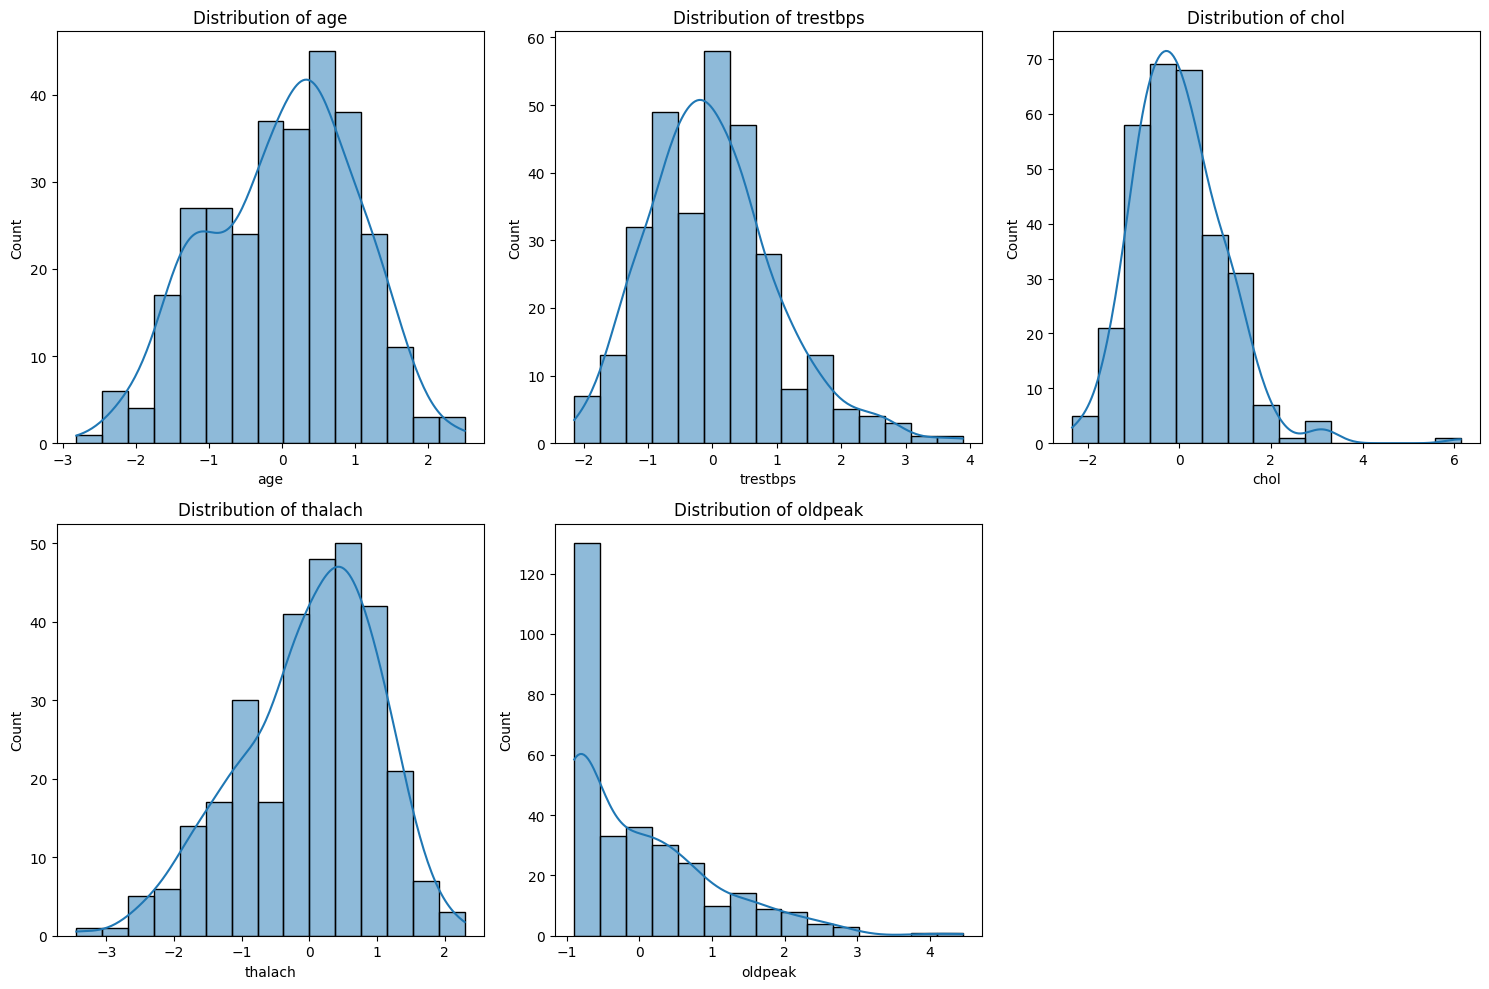

In [12]:
# Create histograms
plt.figure(figsize=(15, 10))
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=15)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

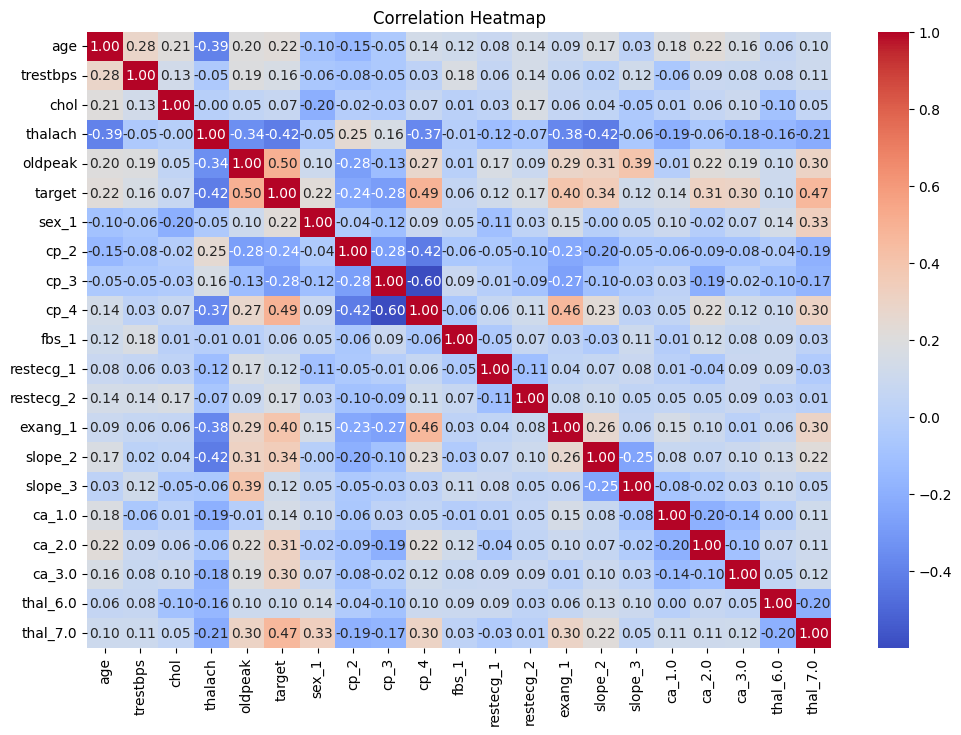

In [13]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

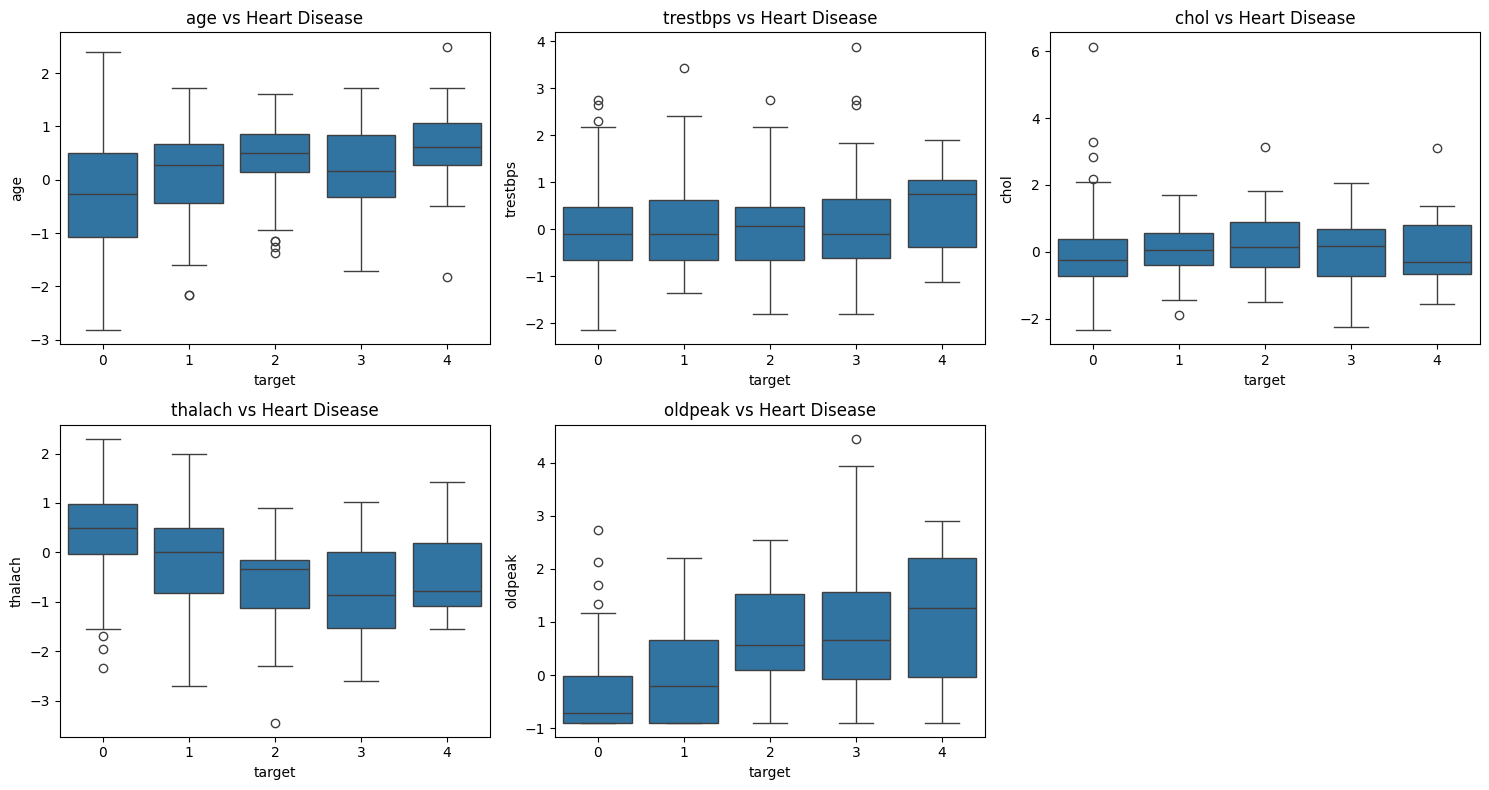

In [14]:
# Create boxplots
plt.figure(figsize=(15, 8))
features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f'{feature} vs Heart Disease')
    plt.tight_layout()
plt.show()

In [15]:
#Save cleaned dataset
df.to_csv('C:\MENNA_DATA\Heart_Disease_Project\cleaned_dataset.csv', index=False)
print("Cleaned dataset saved to 'C:\MENNA_DATA\Heart_Disease_Project\cleaned_dataset.csv'")

Cleaned dataset saved to 'C:\MENNA_DATA\Heart_Disease_Project\cleaned_dataset.csv'
